In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import json

C:\Users\anderoraava\AppData\Local\Temp\ipykernel_22500\1191462951.py:78: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


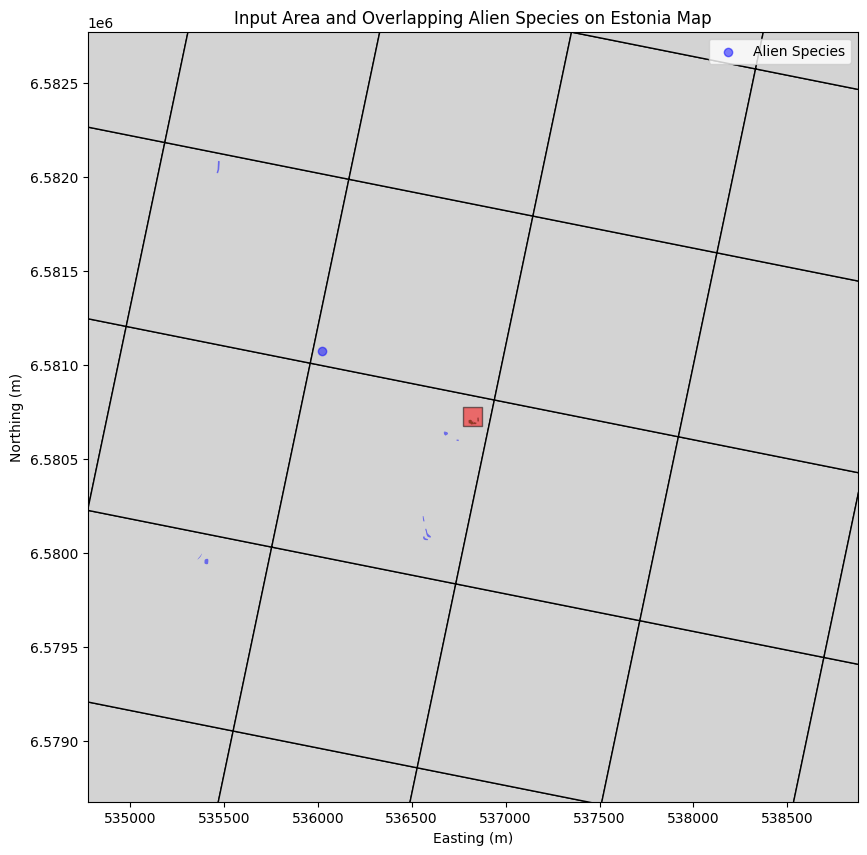

Number of alien species in the area: 2
Species names in the area: ['Heracleum sosnowskyi (Sosnovski karuputk)']


In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import json

# Step 1: Increase the Input Area by Four Times
original_area = [
    [536800, 6580700],
    [536850, 6580700],
    [536850, 6580750],
    [536800, 6580750],
    [536800, 6580700],
]

# Calculate the centroid
centroid_x = sum([point[0] for point in original_area[:-1]]) / 4
centroid_y = sum([point[1] for point in original_area[:-1]]) / 4

# Calculate new coordinates to expand the area by four times
expanded_area = []
for x, y in original_area:
    new_x = centroid_x + 2 * (x - centroid_x)
    new_y = centroid_y + 2 * (y - centroid_y)
    expanded_area.append([new_x, new_y])

# Close the polygon
expanded_area.append(expanded_area[0])

# Step 2: Create the Input Area Polygon
input_area_polygon = Polygon(expanded_area)
input_area_gdf = gpd.GeoDataFrame({'geometry': [input_area_polygon]}, crs='EPSG:3301')

# Step 3: Load the Alien Species Data
file_path = "./Data/kr_voorliik.json"

# Open and read JSON file
with open(file_path, "r", encoding='utf-8') as file:
    alien_data = json.load(file)

# Convert alien species data to GeoDataFrame
alien_gdf = gpd.GeoDataFrame.from_features(alien_data["features"])
alien_gdf.crs = "EPSG:3301"  # Set the CRS to Estonian Coordinate System

# Step 4: Load Estonia's Map
# Replace './Data/Estonia_border/ee_1km.shp' with the actual path to your shapefile
estonia_gdf = gpd.read_file('./Data/Estonia_border/ee_1km.shp')
estonia_gdf = estonia_gdf.to_crs(alien_gdf.crs)

# Step 5: Identify Overlapping Alien Species
overlapping_gdf = alien_gdf[alien_gdf.intersects(input_area_polygon)]
species_count = len(overlapping_gdf)

# Extract species names (using the 'nimi' field from your data)
species_names = overlapping_gdf['nimi'].unique()

# Step 6: Plot the Map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Estonia's map
estonia_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot all alien species areas
alien_gdf.plot(ax=ax, color='blue', alpha=0.5, label='Alien Species')

# Highlight overlapping alien species
overlapping_gdf.plot(ax=ax, color='green', alpha=0.7, label='Overlapping Species')

# Plot input area
input_area_gdf.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', label='Input Area')

# Set plot limits to focus on the area around the input polygon
buffer_distance = 2000  # Adjust as needed
minx, miny, maxx, maxy = input_area_polygon.bounds
ax.set_xlim(minx - buffer_distance, maxx + buffer_distance)
ax.set_ylim(miny - buffer_distance, maxy + buffer_distance)

# Add legend and labels
ax.legend()
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Input Area and Overlapping Alien Species on Estonia Map')
plt.show()

print("Number of alien species in the area:", species_count)
print("Species names in the area:", species_names)

In [18]:
import geopandas as gpd
from shapely.geometry import Polygon
import json

# Step 1: Load the Alien Species Data
file_path = "./Data/kr_voorliik.json"

# Open and read the JSON file
with open(file_path, "r", encoding='utf-8') as file:
    alien_data = json.load(file)

# Convert alien species data to a GeoDataFrame
alien_gdf = gpd.GeoDataFrame.from_features(alien_data["features"])
alien_gdf.crs = "EPSG:3301"  # Set the CRS to Estonian Coordinate System

# Step 2: Filter for 'Heracleum sosnowskyi (Sosnovski karuputk)'
target_species = "Heracleum sosnowskyi (Sosnovski karuputk)"
species_gdf = alien_gdf[alien_gdf['nimi'] == target_species].copy()

# Step 3: Calculate the area of each feature
# The area will be in square meters since the CRS uses meters
species_gdf['area_m2'] = species_gdf.geometry.area

# Step 4: Sum the areas
total_area_m2 = species_gdf['area_m2'].sum()

# Convert to hectares (1 hectare = 10,000 m^2)
total_area_ha = total_area_m2 / 10000

# Step 5: Print the total area
print(f"Total area of '{target_species}': {total_area_m2:.2f} square meters")
print(f"Total area of '{target_species}': {total_area_ha:.4f} hectares")


Total area of 'Heracleum sosnowskyi (Sosnovski karuputk)': 25243953.71 square meters
Total area of 'Heracleum sosnowskyi (Sosnovski karuputk)': 2524.3954 hectares
